# Make (Train | Test) Dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

### Read the data

In [2]:
X = pd.read_csv('../data_root/raw/wine_dataset.csv', index_col=0)

In [3]:
X.shape

(10000, 13)

In [4]:
X.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Fragrances suggest hay, crushed tomato vine an...",Kirchleiten,90,30.0,Northeastern Italy,Alto Adige,NaN,Kerin O’Keefe,@kerinokeefe,Tiefenbrunner 2012 Kirchleiten Sauvignon (Alto...,Sauvignon,Tiefenbrunner
1,France,"Packed with fruit and crisp acidity, this is a...",NaN,87,22.0,Loire Valley,Sancerre,NaN,Roger Voss,@vossroger,Bernard Reverdy et Fils 2014 Rosé (Sancerre),Rosé,Bernard Reverdy et Fils
2,Italy,"This easy, ruby-red wine displays fresh berry ...",NaN,86,NaN,Tuscany,Chianti Classico,NaN,NaN,NaN,Dievole 2009 Chianti Classico,Sangiovese,Dievole
3,US,Pretty in violet and rose petals this is a low...,Horseshoe Bend Vineyard,92,50.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Davis Family 2012 Horseshoe Bend Vineyard Pino...,Pinot Noir,Davis Family
4,US,This golden wine confounds in a mix of wet sto...,Dutton Ranch,93,38.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Dutton-Goldfield 2013 Dutton Ranch Chardonnay ...,Chardonnay,Dutton-Goldfield


### Remove rows with missing target, separate target from predictors

In [5]:
X.dropna(axis=0, subset=['points'], inplace=True)
y = X.points              
X.drop(['points'], axis=1, inplace=True)

In [6]:
X.shape, y.shape

((10000, 12), (10000,))

In [7]:
X.head()

,country,description,designation,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Fragrances suggest hay, crushed tomato vine an...",Kirchleiten,30.0,Northeastern Italy,Alto Adige,NaN,Kerin O’Keefe,@kerinokeefe,Tiefenbrunner 2012 Kirchleiten Sauvignon (Alto...,Sauvignon,Tiefenbrunner
1,France,"Packed with fruit and crisp acidity, this is a...",NaN,22.0,Loire Valley,Sancerre,NaN,Roger Voss,@vossroger,Bernard Reverdy et Fils 2014 Rosé (Sancerre),Rosé,Bernard Reverdy et Fils
2,Italy,"This easy, ruby-red wine displays fresh berry ...",NaN,NaN,Tuscany,Chianti Classico,NaN,NaN,NaN,Dievole 2009 Chianti Classico,Sangiovese,Dievole
3,US,Pretty in violet and rose petals this is a low...,Horseshoe Bend Vineyard,50.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Davis Family 2012 Horseshoe Bend Vineyard Pino...,Pinot Noir,Davis Family
4,US,This golden wine confounds in a mix of wet sto...,Dutton Ranch,38.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Dutton-Goldfield 2013 Dutton Ranch Chardonnay ...,Chardonnay,Dutton-Goldfield


In [8]:
y.head()

0    90
1    87
2    86
3    92
4    93
Name: points, dtype: int64

### Break off validation set from training data

In [9]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [10]:
X_train_full.shape, X_valid_full.shape, y_train.shape, y_valid.shape

((8000, 12), (2000, 12), (8000,), (2000,))

### Drop high-cardinality and uncecessary features

High-cardinality features (number of unique values) can lead to poor model performance and memory issues when trying to fit the model because encoding can result in extremely large matrices of values.

In [11]:
# Select categorical columns with relatively low cardinality
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 1000 and 
                        X_train_full[cname].dtype == "object"]

Doing some research into the factors that influence wine quality, a large consensus centers around enviromental factors (i.e. climate, temperature, sunlight, soil etc...), so features about geographical location (i.e. country, province, region etc...) make sense.

In [12]:
low_cardinality_cols

['country',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'variety']

`taster_twitter_handle` provides no additional information on top of `taster_name` so we'll remove it.

In [13]:
low_cardinality_cols.remove('taster_twitter_handle')
low_cardinality_cols

['country', 'province', 'region_1', 'region_2', 'taster_name', 'variety']

### Select numeric columns

In [14]:
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]
numeric_cols

['price']

### Keep selected columns only

In [15]:
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [16]:
X_train.shape, X_valid.shape

((8000, 7), (2000, 7))

### One-hot encode the data and align the columns between the train and validation datasets

In [17]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [18]:
X_train.shape, X_valid.shape

((8000, 1267), (2000, 1267))

In [19]:
X_train.columns, X_valid.columns

(Index(['price', 'country_Argentina', 'country_Australia', 'country_Austria',
        'country_Brazil', 'country_Bulgaria', 'country_Canada', 'country_Chile',
        'country_Croatia', 'country_Cyprus',
        ...
        'variety_Viognier-Marsanne', 'variety_Vitovska', 'variety_Viura',
        'variety_Viura-Chardonnay', 'variety_Weissburgunder',
        'variety_White Blend', 'variety_Xarel-lo', 'variety_Xinomavro',
        'variety_Zinfandel', 'variety_Zweigelt'],
       dtype='object', length=1267),
 Index(['price', 'country_Argentina', 'country_Australia', 'country_Austria',
        'country_Brazil', 'country_Bulgaria', 'country_Canada', 'country_Chile',
        'country_Croatia', 'country_Cyprus',
        ...
        'variety_Viognier-Marsanne', 'variety_Vitovska', 'variety_Viura',
        'variety_Viura-Chardonnay', 'variety_Weissburgunder',
        'variety_White Blend', 'variety_Xarel-lo', 'variety_Xinomavro',
        'variety_Zinfandel', 'variety_Zweigelt'],
       dtype='o

# Train Model

XGBoost is considered one of the best machine learning libraries for predicting tabular data.  (Explain a bit about the algo?)

We will use the `XGBRegressor` to predict wine points.

In [20]:
from xgboost import XGBRegressor

(explain hyperparameters, use notes)

(set `verbose=False` for production)

In [21]:
# Define the model
model_1 = XGBRegressor(n_estimators=1000, learning_rate=0.05)

# Fit the model
model_1.fit(X_train, y_train, early_stopping_rounds=5,
            eval_set=[(X_valid, y_valid)], verbose=True)

[0]	validation_0-rmse:83.61225
[1]	validation_0-rmse:79.43694
[2]	validation_0-rmse:75.46937
[3]	validation_0-rmse:71.70147
[4]	validation_0-rmse:68.12328
[5]	validation_0-rmse:64.72417
[6]	validation_0-rmse:61.49340
[7]	validation_0-rmse:58.42688
[8]	validation_0-rmse:55.51317
[9]	validation_0-rmse:52.74454
[10]	validation_0-rmse:50.11608
[11]	validation_0-rmse:47.61934
[12]	validation_0-rmse:45.24560
[13]	validation_0-rmse:42.99186
[14]	validation_0-rmse:40.85226
[15]	validation_0-rmse:38.81837
[16]	validation_0-rmse:36.88747
[17]	validation_0-rmse:35.05310
[18]	validation_0-rmse:33.31047
[19]	validation_0-rmse:31.65555
[20]	validation_0-rmse:30.08478
[21]	validation_0-rmse:28.59279
[22]	validation_0-rmse:27.17541
[23]	validation_0-rmse:25.82993
[24]	validation_0-rmse:24.55192
[25]	validation_0-rmse:23.33959
[26]	validation_0-rmse:22.18844
[27]	validation_0-rmse:21.09504
[28]	validation_0-rmse:20.05732
[29]	validation_0-rmse:19.07234
[30]	validation_0-rmse:18.13786
[31]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Evaluate Model

## Model Evaluation Report

### Overview of the prediction algorithm

This model uses a machine learning algorithm called **gradient boosting**, which is generally a high-performing and efficient prediction algorithm for tabular data, such as our wine dataset.  This is a type of ensemble method, which combines the predictions of several models.

Gradient boosting goes through cycles to iteratively add models into an ensemble.  It begins by initializing the ensemble with a single model, whose predictions can be pretty naive.  Even if its predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.

Here is a general overview of the cycle:
- First, we use the current ensemble to generate predictions for each observation in the dataset.  To make a prediction, we add the predictions from all models in the ensemble.  
- These predictions are used to calculate a loss function (like [root mean squared error](https://en.wikipedia.org/wiki/Root-mean-square_deviation), for instance).
- Then, we use the loss function to fit a new model that will be added to the ensemble.  Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss.  The "gradient" in "gradient boosting" refers to the fact that we'll use [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) on the loss function to determine the parameters in this new model.
- Finally, we add the new model to the ensemble, and repeat the cycle until some stopping threshold is met.

<img src='../images/gradient_boost_diagram.png'>

Specifically, we use the **XGBoost** Python library, which stands for **extreme gradient boosting** and is an implementation of gradient boosting with several additional features focused on performance and speed.

### Evaluating the model

In the following sections, we will look at various metrics and plots to evaluate the performance and suitability of our model.  (The calculated metrics and displayed plots below were produced with the parameter `random_state=0` when creating the training and validation datasets.  The results remain consistent when tested with different random states).  

#### Mean Absolute Error

Mean Absolute Error (MAE) is the average of the absolute value of all error values (predicted value minus actual value).  It is calculated with the following formula:

<img src='../images/MAE_formula.png'>

In the next code cell, we use our trained model to make the wine score predictions on the validation data (the portion of the total dataset that the model has not seen and has no knowledge of).  We then take those predictions and the actual wine scores from the validation data to calculate and display the MAE (using a function from the `sklearn` Python library). 

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Get predictions
predictions_1 = model_1.predict(X_valid)

# Calculate MAE
mae_1 = mean_absolute_error(predictions_1, y_valid)
print("MAE:" , mae_1)

MAE: 1.8436909980773926


At first, a MAE of approximately 1.8 would appear to be very good.  If the wine scores ranged from 0 to 100, then the average error of the predictions is only 1.8% of the total range.  However, the wine score range in this dataset is only 80 to 100.  As we can see from the next code cell, this means the average error of the predictions is approximately 9.2% of the total range.

(Implications)...

In [28]:
# MAE as % of total range
mae_perc = mae_1 / (y.max() - y.min()) * 100
print("MAE as a % of total range:" , mae_perc, "%")

MAE as a % of total range: 9.218454990386963 %


In [24]:
# Calculate R-squared
r_squared_1 = r2_score(y_valid, predictions_1)
print("R-Squared:" , r_squared_1)

R-Squared: 0.4289673530698145


In [25]:
compare_1 = pd.DataFrame({'actual': y_valid, 'predict': predictions_1})
compare_1.head()

,actual,predict
9394,90,89.473190
898,89,88.482430
2398,84,85.651123
5906,90,89.036766
2343,84,88.168869


<AxesSubplot:xlabel='actual', ylabel='predict'>

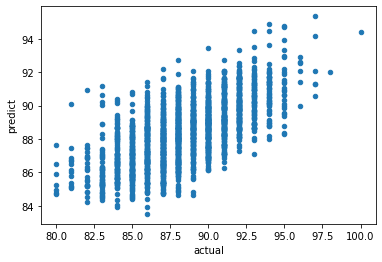

In [26]:
compare_1.plot.scatter('actual', 'predict')